In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import japanize_matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from scipy.integrate import odeint 


In [9]:
# ========================
# 常微分方程式を解くクラス
# ========================
class ODE(object):
    
    # ========================
    # コンストラクター
    # ========================
    def __init__(self, diff_eq, init_con):
        self.diff_eq = diff_eq
        self.init_con =init_con 
    
    # ========================
    # 常微分方程式の計算
    # ========================
    def cal_equation(self, t_min, t_max, N):
        t = np.linspace(t_min, t_max, N)            # xの配列の生成
        v = odeint(self.diff_eq, self.init_con, t)  # 方程式の計算
        return t, v

# １．緩和をIの時間微分で入れた場合

In [169]:
# ========================
# プロット 
# ========================
def plot(t, S, I, R):
    fig, ax = plt.subplots()

    c1,c2,c3 = "blue","red","black"
    l1,l2,l3 = "S","I","R"

    ax.set_xlabel('t')
    ax.set_ylabel('人数')
    ax.set_title(r'人数の変化')
    ax.grid()            # 罫線
    ax.plot(t, S, color=c1, label=l1)
    ax.plot(t, I, color=c2, label=l2)
    ax.plot(t, R, color=c3, label=l3)
    ax.legend(loc=0)    # 凡例
    # スクリーン表示
    fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
    plt.savefig('Original_SIR1.png')
    plt.show()

In [185]:
# VER.1
# ========================
# 解くべき常微分方程式（Iの時間微分による緩和）
# ========================
def diff_eq(v, t):
    beta = 0.00025
    alpha0 = 1
    # alpha1 = 0
    alpha1 = 0.0000003
    gamma = 1 
    dSdt = - beta * alpha0 * v[0] * v[1] - alpha1 * v[0] * v[1] * (beta * alpha0 * v[0] * v[1] - gamma * v[1]) / (1 + beta * alpha1 * v[0] * v[1])
    dIdt = (beta * alpha0 * v[0] * v[1] - gamma * v[1]) / (1 + beta * alpha1 * v[0] * v[1])
    dRdt = gamma * v[1] 
    return [dSdt, dIdt, dRdt]

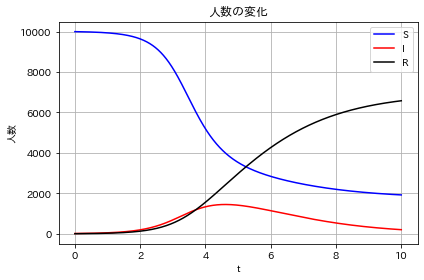

In [186]:
# ========================
# メイン関数
# ========================
N = 10000           # 分割数
min_t = 0           # tの最小
max_t = 10         # tの最大
initial_condition = np.array([10000, 10, 0])     # 初期条件

ode = ODE(diff_eq, initial_condition)
t, v = ode.cal_equation(min_t, max_t, N)

plot(t, v[:,0], v[:,1], v[:,2])


# ２．緩和をIの時間に関する2階微分で入れた場合

In [16]:
# ========================
# プロット 
# ========================
def plot(t, S, I, dIdt, R):
    fig, ax = plt.subplots()

    c1,c2,c3,c4 = "blue","red","orange","black"
    l1,l2,l3,l4 = "S","I","dIdt","R"

    ax.set_xlabel('t')
    ax.set_ylabel('人数')
    ax.set_title(r'人数の変化')
    ax.grid()            # 罫線
    ax.plot(t, S, color=c1, label=l1)
    ax.plot(t, I, color=c2, label=l2)
    ax.plot(t, dIdt, color=c3, label=l3)
    ax.plot(t, R, color=c4, label=l4)
    ax.legend(loc=0)    # 凡例
    # スクリーン表示
    fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
    plt.savefig('Original_SIR2.png')
    plt.show()

In [17]:
# ========================
# 解くべき常微分方程式（Iの時間に関する2階微分による緩和）
# ========================
def diff_eq(v, t):
    beta = 0.00003
    alpha0 = 15
    alpha1 = 0.0003
    gamma = 1 
    dSdt = - gamma * v[1] - v[2]
    dIdt = v[2] 
    dJdt = (beta * alpha0 * v[0] * v[1] - gamma * v[1] - v[2]) / (beta * alpha1 * v[0] * v[1])
    dRdt = gamma * v[1] 
    return [dSdt, dIdt, dJdt, dRdt]

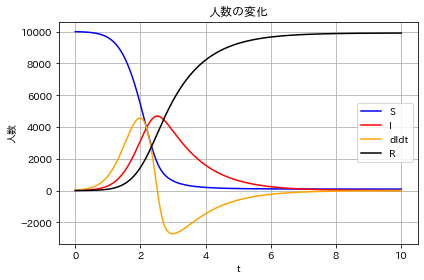

In [18]:
# ========================
# メイン関数
# ========================
N = 10000           # 分割数
min_t = 0           # tの最小
max_t = 10         # tの最大
initial_condition = np.array([10000, 10, 1, 0])     # 初期条件

ode = ODE(diff_eq, initial_condition)
t, v = ode.cal_equation(min_t, max_t, N)

plot(t, v[:,0], v[:,1], v[:,2], v[:,3])

# ３．新規感染者数の推移を見るためにdSdtもプロットする

In [19]:
# ========================
# プロット 
# ========================
def plot(t, S, dSdt, I, dIdt, R):
    fig, ax = plt.subplots()

    c1,c2,c3,c4,c5 = "blue","cyan","red","orange","black"
    l1,l2,l3,l4,l5 = "S","-dSdt:新規感染者数","I","dIdt","R"

    ax.set_xlabel('t')
    ax.set_ylabel('人数')
    ax.set_title(r'人数の変化')
    ax.grid()            # 罫線
    ax.plot(t, S, color=c1, label=l1)
    ax.plot(t, -dSdt, color=c2, label=l2)
    ax.plot(t, I, color=c3, label=l3)
    ax.plot(t, dIdt, color=c4, label=l4)
    ax.plot(t, R, color=c5, label=l5)
    ax.legend(loc=0)    # 凡例
    # スクリーン表示
    fig.tight_layout()  # レイアウトの設定（保存の直前に入れて調整）
    plt.savefig('Original_SIR3.png')
    plt.show()

In [20]:
# ========================
# 解くべき常微分方程式（Iの時間に関する2階微分による緩和）
# ========================
def diff_eq(v, t):
    beta = 0.00003
    alpha0 = 15
    alpha1 = 0.0003
    gamma = 1 
    dSdt = - gamma * v[2] - v[3]
    dTdt = - gamma * v[3] - (beta * alpha0 * v[0] * v[2] - gamma * v[2] - v[3]) / (beta * alpha1 * v[0] * v[2])
    dIdt = v[3] 
    dJdt = (beta * alpha0 * v[0] * v[2] - gamma * v[2] - v[3]) / (beta * alpha1 * v[0] * v[2])
    dRdt = gamma * v[2] 
    return [dSdt, dTdt, dIdt, dJdt, dRdt]

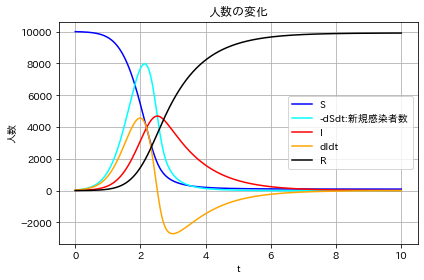

In [21]:
# ========================
# メイン関数
# ========================
N = 10000           # 分割数
min_t = 0           # tの最小
max_t = 10         # tの最大
initial_condition = np.array([10000, -1, 10, 1, 0])     # 初期条件(S, dSdt, I, dIdt, R)

ode = ODE(diff_eq, initial_condition)
t, v = ode.cal_equation(min_t, max_t, N)

plot(t, v[:,0], v[:,1], v[:,2], v[:,3], v[:,4])